# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [11]:
import math
N = 10000 # Each round n corresponds to a user # can change number of rounds to see how quickly UCB identifies best option
d = 10 # number of ads
ads_selected = []
numbers_of_selections = [0] * d # 10 0s, every time add n is selected, n in array increases
sums_of_rewards = [0] * d 
total_reward = 0
for n in range(0, N):
    ad = 0 # start with ad # 1 the iterate through remaining ads
    max_upper_bound = 0 # once ad has higher upper bound, will be assigned here
    for i in range(0, d):
        if numbers_of_selections[i] > 0: #if ad already selected
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # set to highest possible upperbound
        if upper_bound > max_upper_bound: # selecting ad that was not selected yet. 
            max_upper_bound = upper_bound
            ad = i 
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1 # increment index of ad by one
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

## Visualising the results

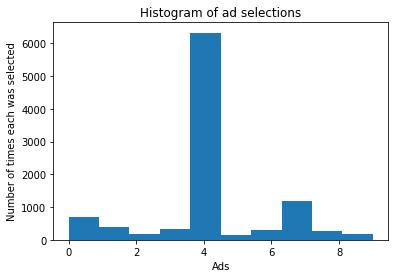

In [12]:
plt.hist(ads_selected)
plt.title('Histogram of ad selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each was selected')
plt.show()